# センサ人工データ生成ノートブック

## 概要
人工データの構築にどのような要素が必要で、どのように構築していくかを記述する。

## 要素
- データ構造
    - 平均
    - 周期
    - 振幅
    - 標準偏差
- データ取得
    - データ期間
    - 取得間隔
- センサ数
    - 構築するセンサ数

## 想定フロー
1. 構築するセンサ数を指定
2. それに合わせたパラメータの要求およびパラメータの入力
3. データセットの作成
4. データセットの可視化
5. データセットの保存

---
## ライブラリのインポート

In [ ]:
import importlib
import ipywidgets as widgets
from IPython.display import display, clear_output
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from functions import SensorDataGeneratorUI

from functions import (
    generate_sensor_data,
    generate_dataset,
    plot_sensor_data,
    save_dataset
)

%matplotlib inline

In [35]:
import functions
importlib.reload(functions)
from functions import SensorDataGeneratorUI

from functions import (
    generate_sensor_data,
    generate_dataset,
    plot_sensor_data,
    save_dataset
)


---
## センサの実験
1センサでの実験を実現し、パラメータに対するデータの挙動を調査する

### 1センサ用のパラメータ設定

In [78]:
# 共通パラメータ
exp_start_date = datetime(2023, 1, 1)
exp_end_date = datetime(2025, 3, 31)
exp_interval_hours = 1

# Y軸範囲（実験用）
exp_y_min = 0.0
exp_y_max = 200.0

# センサパラメータ
exp_mean = 100.0       # 平均
exp_period_days = 10  # 周期（日）
exp_amplitude = 60  # 振幅
exp_std = 10      # 標準偏差

# シード値
seed = 42

### データセットの可視化（実験用）

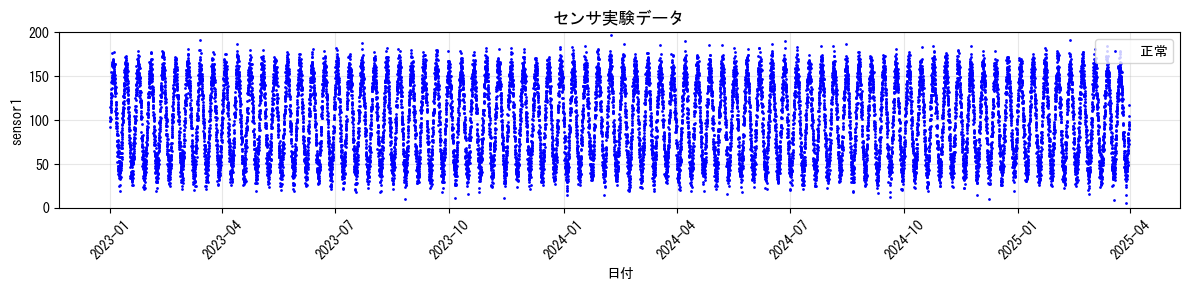

データ件数: 19681


In [79]:
# 実験用データ生成
exp_df = generate_dataset(start_date=exp_start_date,end_date=exp_end_date,interval_hours=exp_interval_hours,sensor_params=[{'mean': exp_mean,'period_days': exp_period_days,'amplitude': exp_amplitude,'std': exp_std}],seed=seed)

# 可視化
plot_sensor_data(exp_df, title="センサ実験データ", y_min=exp_y_min, y_max=exp_y_max)
plt.show()

# データ確認
print(f"データ件数: {len(exp_df)}")

---
## センサの準備及び可視化
構築するセンサ数を指定し、動的にパラメータを入力する

In [4]:
ui = SensorDataGeneratorUI()
ui.show()